In [43]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [44]:
def read_image(input_path):
    s= cv2.imread(input_path)
    # Chuyển đổi sang không gian màu LAB
    s = cv2.cvtColor(s,cv2.COLOR_BGR2LAB)
    return s

def show_images(inp_img, ref_img, out_img):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(inp_img, cv2.COLOR_BGR2RGB))
    plt.title('Source Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(ref_img, cv2.COLOR_BGR2RGB))
    plt.title('Destination Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB))
    plt.title('Output Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

def save_image(img):
   cv2.imwrite('./media/output_images/result.png', img)


In [45]:
# Hàm lấy trung bình và độ lệch chuẩn
def get_mean_and_std(x):
    x_mean, x_std = cv2.meanStdDev(x)  # Lấy trung bình và độ lệch chuẩn của từng kênh.
    x_mean = np.hstack(np.around(x_mean, 2))  # Chuyển thành mảng 1 chiều và làm tròn.
    x_std = np.hstack(np.around(x_std, 2))    # Tương tự cho độ lệch chuẩn.
    return x_mean, x_std

In [46]:
input_path = '../Images/monaLisaTrain/copy_1.jpg'
ref_path = '../Images/starryNightTrain/copy_1.jpg'
inp_img = read_image(input_path)
ref_img = read_image(ref_path)

In [47]:
i_mean, i_std = get_mean_and_std(inp_img)
r_mean, r_std = get_mean_and_std(ref_img)

# Lấy thông tin kích thước và kênh màu ảnh đầu vào
height, width, channels = inp_img.shape

In [48]:
# Điều chỉnh màu sắc cho từng pixel
temp_img = inp_img.copy()
for i in range(0, height):
    for j in range(0, width):
        for k in range(0, channels):
            x = temp_img[i, j, k]  # Giá trị pixel của ảnh nguồn tại (i, j, k).
            x = ((x - i_mean[k]) * (r_std[k] / i_std[k])) + r_mean[k]
            x = round(x)  # Làm tròn giá trị.
            x = 0 if x < 0 else x  # Kiểm tra biên dưới.
            x = 255 if x > 255 else x  # Kiểm tra biên trên.
            temp_img[i, j, k] = x  # Gán lại giá trị pixel.

In [49]:
# Chuyển đổi từ LAB về BGR
out_img = cv2.cvtColor(temp_img, cv2.COLOR_LAB2BGR)
save_image(out_img)

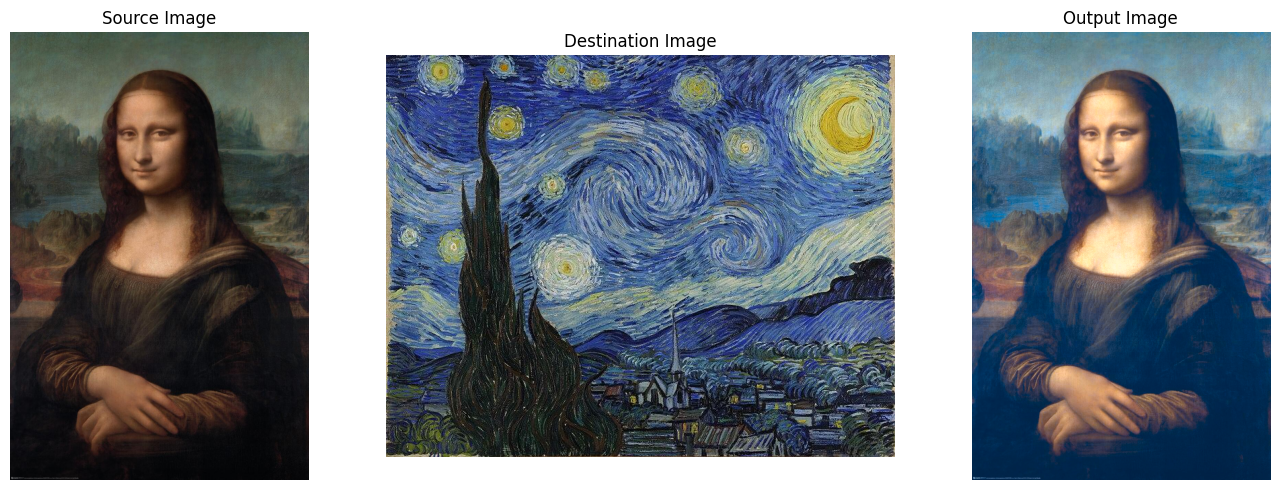

In [50]:
# Hiển thị hình ảnh
source_img = cv2.imread(input_path)
reference_img = cv2.imread(ref_path)
show_images(source_img, reference_img, out_img)